 # <center>Cat Vs. Dog Classifier with Deep learning (Part 1)</center>

## Part 01 : Data Preprocessing

#### (Note: Aim of this notebook is get more familiar with the dataset.)<br> 
As the very first step We must import necessary libraries.

In [1]:
#Import Libraries
import numpy as np
import cv2
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print('Now all the necessary Libraries are successfully Imported.')

Now all the necessary Libraries are successfully Imported.


In this case, I have prepared four seperted Data sets.

In [2]:
#Define the paths to Data folders
DOGS_Training_Set = './DataSet/DOGS/'
CATS_Training_Set = './DataSet/CATS/'
DOGS_Test_Set = './DataSet/DT/'
CATS_Test_Set = './DataSet/CT/'

In [3]:
train_x_original = []    # creating a empty python list for store each training image.
train_y = []             # creating a empty python list to store corresponding labels.
test_x_original = []     # creating a empty python list for store each test image.
test_y = []              # creating a empty python list to store corresponding labels.

In [4]:
# loading the training data sets and Set the labels.

for file_name in os.listdir(DOGS_Training_Set):         #loop over file by file in the location 'DOGS_Training_Set'
    
    file_location = DOGS_Training_Set + str(file_name)  # Define a file location to each image
    image = cv2.imread(file_location)                   # Reading the images in the file_location & store them in 'image' variable as an array
    image_resized = cv2.resize(image,(128,128))         # Take that 'image' and resize into 128 x 128.
    train_x_original.append(image_resized)              # Append the resized images into train_x_original list
    train_y.append(1)                                   # Append corresponding label to train_y list (Dog = 1)
    
for file_name in os.listdir(CATS_Training_Set):         #loop over file by file in the location 'CATS_Training_Set'
    
    file_location = CATS_Training_Set + str(file_name)  # Define a file location to each image
    image = cv2.imread(file_location)                   # Reading the images in the file_location & store them in 'image' variable as an array
    image_resized = cv2.resize(image,(128,128))         # Resize 'image' into 128 x 128.
    train_x_original.append(image_resized)              # Append the resized_] images into train_x_original list
    train_y.append(0)                                   # Append corresponding label to train_y list (Cat = 0)

train_x_original = np.array(train_x_original)           # Convert python list to numpy array
train_y = np.array(train_y)                             # Convert python list to numpy array    
    
print("train_x_original shape: " + str(train_x_original.shape))
print("test_y shape: " + str(train_y.shape))

train_x_original shape: (831, 128, 128, 3)
test_y shape: (831,)


In [5]:
# loading the training data sets and Set the label.

for file_name in os.listdir(DOGS_Test_Set):        #loop over file by file in the location 'DOGS'
    
    file_location = DOGS_Test_Set + str(file_name) # This will make the file location to the image
    image = cv2.imread(file_location)              # Reading the image in file location & store it in 'image' variable as an array
    image_resized = cv2.resize(image,(128,128))    # Take that 'image' and resize into 128 x 128.
    test_x_original.append(image_resized)          # Append the resized image into our train_x list
    test_y.append(1)                               # Append corresponding label to our train_y list (Dog = 1)
    
for file_name in os.listdir(CATS_Test_Set):        #loop over file by file in the location 'CATS_Test_Set'
    
    file_location = CATS_Test_Set + str(file_name) # This will make the file location to the image
    image = cv2.imread(file_location)              # Reading the images in the file_location & store them in 'image' variable as an array
    image_resized = cv2.resize(image,(128,128))    # Take that 'image' and resize into 128 x 128.
    test_x_original.append(image_resized)          # Append the resized image into train_x_original list
    test_y.append(0)                               # Append corresponding label to train_y list (Cat = 0)
    

test_x_original = np.array(test_x_original)        # Convert python list to numpy array
test_y = np.array(test_y)                          # Convert python list to numpy array    

print("test_x_original shape: " + str(test_x_original.shape))
print("test_y shape: " + str(test_y.shape))

test_x_original shape: (145, 128, 128, 3)
test_y shape: (145,)


In [6]:
m_train = train_x_original.shape[0]                # number of training examples
m_test = test_x_original.shape[0]                  # number of test examples
num_px = train_x_original.shape[1]                 # height = width of a training image

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Number of training examples: m_train = 831
Number of testing examples: m_test = 145
Height/Width of each image: num_px = 128
Each image is of size: (128, 128, 3)


Label of the image which selected from Training set:  1
Label of the image which selected from Test set:  0


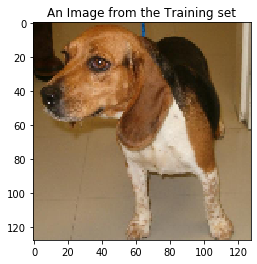

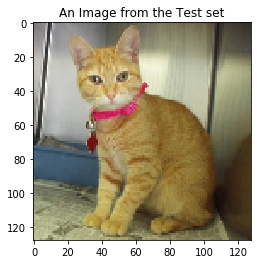

In [7]:
Train_index = 80                                          # Select an index which want to check from Training Set
Test_index = 140                                          # Select an index which want to check from Test Set

image_train = train_x_original[Train_index]               # take an image from train_x_original
label_train = train_y[Train_index]                        # take the corresponding label from train_y

image_test = test_x_original[Test_index]                  # take an image from test_x_original
label_test = test_y[Test_index]                           # take the corresponding label from train_y

plt.imshow(cv2.cvtColor(image_train, cv2.COLOR_BGR2RGB))  #convert BGR image into RGB image
plt.title('An Image from the Training set')               #Add title to the image
plt.figure()                                              #This will prevent overwritting of an image
plt.imshow(cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB))
plt.title('An Image from the Test set')

print('Label of the image which selected from Training set: ', label_train)
print('Label of the image which selected from Test set: ', label_test)

Using following code, we can Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px ∗ num_px ∗ 3, 1).

In [8]:
train_x_flatten = train_x_original.reshape(train_x_original.shape[0],-1).T
test_x_flatten = test_x_original.reshape(test_x_original.shape[0],-1).T
print(train_x_flatten.shape)
print(test_x_flatten.shape)
print ("sanity check after reshaping: " + str(train_x_flatten[0:5,0]))
print ("sanity check after reshaping: " + str(test_x_flatten[0:5,0]))

(49152, 831)
(49152, 145)
sanity check after reshaping: [253 252 255 253 251]
sanity check after reshaping: [85 88 86 78 78]


Let's standardize our dataset now.

In [10]:
X_train = train_x_flatten/255.
X_test = test_x_flatten/255.

print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))
print("train_y shape: " + str(train_y.shape))
print("test_y shape: " + str(test_y.shape))

X_train shape: (49152, 831)
X_test shape: (49152, 145)
train_y shape: (831,)
test_y shape: (145,)


Let's create h5 file now.

In [16]:
hf = h5py.File('./dataset.h5', 'w')

In [17]:
hf.create_dataset('X_train', data=X_train)
hf.create_dataset('train_y', data=train_y)
hf.create_dataset('X_test', data=X_test)
hf.create_dataset('test_y', data=test_y)

<HDF5 dataset "test_y": shape (145,), type "<i4">

In [18]:
hf.close()